# <center>Making Graphs</center>
Graphs are made by evaluating the function to be plotted at
a series of points (usually, but not necessarily equally spaced), 
and joining the points by lines, which can be straight or some fancier curve.  We are using the `pyplot` library (in `matplotlib`), which is
useful, but has some limitations when plotting functions that have cusps or discontinuities.  pyplot documentation is [here](http://matplotlib.org/users/pyplot_tutorial.html) and [here](http://matplotlib.org/api/pyplot_api.html).

First, let's plot the sine function, `np.sin(x)`.  It's a nice, continuous function.  Unfortunately, if you replace it with `potential(x,R)` in the indicated statement, you'll find that `pyplot`'s `plot` function fails.

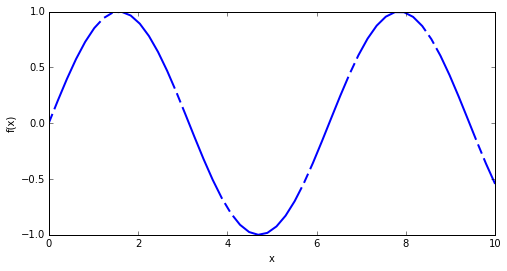

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Display the plots here (inline).
%matplotlib inline                     
mpl.rcParams['figure.figsize']=[8,4]  # Set H and V sizes of plots.

# The potential of a uniformly charged sphere has a cusp.
# We'll try to plot it, but the cusp makes it complicated.
def potential(r,R):
    if  r > R:
        return 1/r
    else:
        return r/R**2

# Use pyplot to graph the sine function.
# This statement specifies the domain of the x-axis.
# It creates a list of x values, which you can see by printing x.
x = np.linspace(0, 10)

Radius = 1.0        # The radius of the sphere

# ----
# If you replace np.sin(x) with potential(x,Radius).  It will fail.
line, = plt.plot(x, np.sin(x), '--', linewidth=2)
# ----

plt.ylabel("f(x)")
plt.xlabel("x")

# Control the appearance of the plotted line.
dashes = [10, 5, 100, 5] # 10 points on, 5 off, 100 on, 5 off
line.set_dashes(dashes)

plt.show()

`plot` actually just plots lists of (x,y) pairs.  
We can obtain the same result as above by creating the lists by hand.<br>
Note that we can use the "for" construct to create a list.

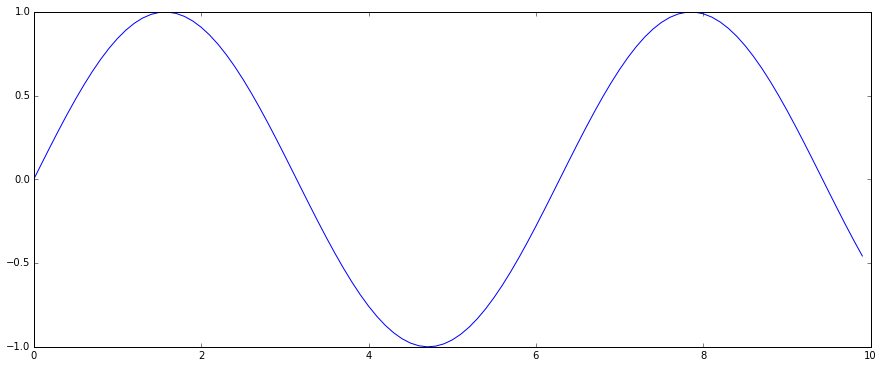

In [14]:
x1 = [0.1*i         for i in range(0,100)]
y1 = [np.sin(0.1*i) for i in range(0,100)]
plt.plot(x1,y1)
plt.show()

The manual method will let us plot functions with kinks or
discontinutities, which the `pyplot` library can't easily handle.
Let's plot `potential(r)`.  Start by creating two (x,y) lists, 
one for each region of `r`.

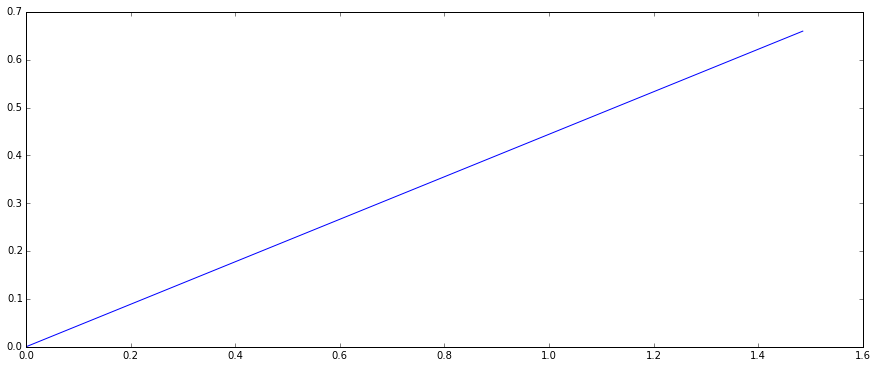

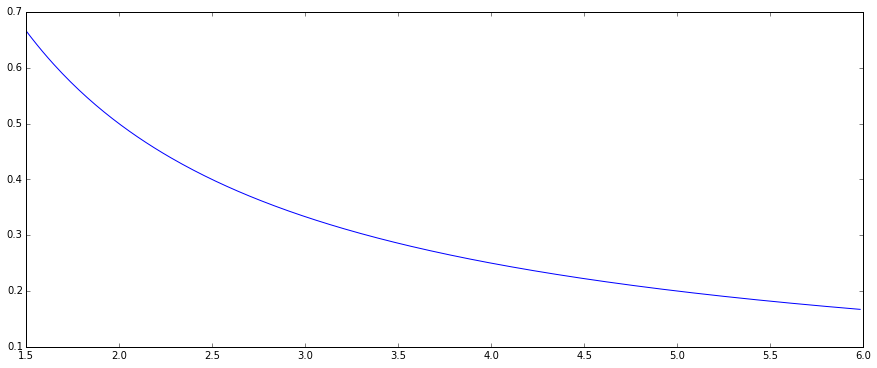

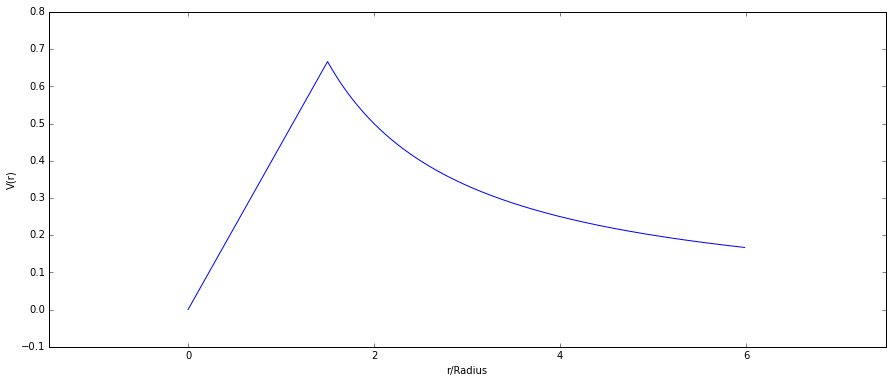

In [15]:
# Set up the radial steps.  
Radius    = 1.5          # The radius of the sphere
rfraction = 0.01         # Make each step 1% of the radius.
rstep     = rfraction*Radius
rmax      = 4*Radius     # How far out to go.

# Define the potential function.
def potential(r,R):
    if  r > R:
        return 1/r
    else:
        return r/R**2

# The r < Radius part of the graph:
# range requires insteps (the # steps to take) to be an integer.
insteps   = int(Radius/rstep) 
xin = [i*rstep                    for i in range(0,insteps)]
yin = [potential(i*rstep, Radius) for i in range(0,insteps)]

# Plot the r < Radius part.
plt.plot(xin,yin)
plt.show()

# The r > Radius part of the graph.  xout starts at r = Radius.
rmax     = 4*Radius
outsteps = int((rmax-Radius)/rstep)
xout = [(i+insteps)*rstep                    for i in range(0,outsteps)]
yout = [potential((i+insteps)*rstep, Radius) for i in range(0,outsteps)]

# Plot the r > Radius part.
plt.plot(xout,yout)
plt.show()

# Put the two parts together.
# Merging lists is simple - just add them!
# Now, we can plot a function that has a cusp!!
x2 = xin + xout
y2 = yin + yout
plt.ylabel("V(r)")
plt.xlabel("r/Radius")
# Set the plot limits to leave some white space around the graph.
plt.xlim(-Radius,5*Radius)
plt.ylim(-0.1,0.8)
plt.plot(x2,y2)
plt.show()

We can plot two functions at the same time.
Notice that the plot limits expand to hold the graphs.

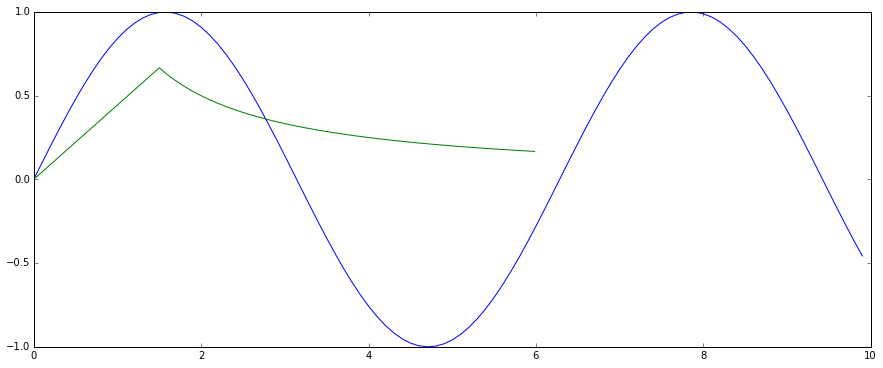

In [16]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()